Gender and Age Detection: predict if a person is a male or female and also their age

Importing Dataset & Libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
utkface_dir = r'D:\DL Practical\Miniproject (Take 3)\UTKFace' # Path to the UTKFace dataset

In [3]:
img_size = (128, 128)

In [4]:
# Load the images and labels from the UTKFace dataset
images = []
genders = []
ages = []
for filename in os.listdir(utkface_dir):
    if filename.endswith(".jpg"):
        # Load the image
        img = cv2.imread(os.path.join(utkface_dir, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #BGR to RGB
        img = cv2.resize(img, img_size)
        images.append(img)
        
        temp = filename.split('_')
        
        # Extract the gender and age from the filename
        age = int(temp[0])
        gender = int(temp[1])
        ages.append(age)
        genders.append(gender)

In [5]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = images, ages, genders

In [6]:
df

,image,age,gender
0,"[[[107, 80, 50], [100, 73, 43], [104, 78, 44],...",10,0
1,"[[[66, 33, 24], [107, 75, 64], [108, 74, 63], ...",10,0
2,"[[[88, 56, 36], [86, 54, 33], [95, 63, 42], [1...",10,0
3,"[[[131, 95, 89], [72, 37, 32], [53, 23, 19], [...",10,0
4,"[[[32, 20, 20], [20, 10, 9], [10, 2, 1], [5, 1...",10,0
...,...,...,...
21306,"[[[254, 255, 255], [254, 255, 255], [253, 255,...",9,1
21307,"[[[7, 7, 7], [0, 0, 0], [1, 1, 1], [4, 4, 4], ...",9,1
21308,"[[[220, 210, 200], [216, 208, 197], [208, 201,...",9,1
21309,"[[[8, 8, 6], [7, 9, 8], [7, 9, 8], [7, 9, 8], ...",9,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21311 entries, 0 to 21310
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   21311 non-null  object
 1   age     21311 non-null  int64 
 2   gender  21311 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 499.6+ KB


In [8]:
age_classnames=['Male', 'Female']  # 0 - Male & 1 - Female

In [9]:
df['image'].values[100] #This is a multi-dimensional array representing an image in the RGB color space. 

array([[[  0, 191, 222],
        [  9, 182, 210],
        [ 39, 172, 195],
        ...,
        [199, 191, 177],
        [205, 199, 186],
        [202, 195, 185]],

       [[  9, 195, 224],
        [ 20, 183, 210],
        [ 56, 181, 202],
        ...,
        [186, 177, 163],
        [190, 183, 170],
        [197, 191, 179]],

       [[ 32, 197, 221],
        [ 41, 183, 205],
        [ 78, 184, 201],
        ...,
        [184, 173, 157],
        [180, 172, 158],
        [189, 182, 169]],

       ...,

       [[168, 123, 100],
        [179, 141, 125],
        [193, 162, 155],
        ...,
        [ 80,  39,  10],
        [ 81,  40,  12],
        [ 79,  38,  10]],

       [[166, 121,  99],
        [176, 137, 124],
        [192, 163, 157],
        ...,
        [ 78,  37,   8],
        [ 79,  38,  11],
        [ 77,  36,   8]],

       [[163, 119,  97],
        [174, 135, 122],
        [191, 161, 159],
        ...,
        [ 77,  36,   7],
        [ 79,  38,  10],
        [ 76,  35,   7]]

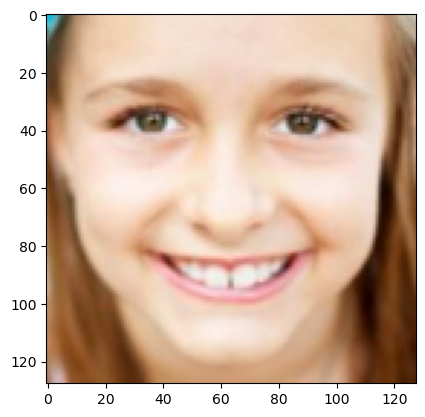

In [10]:
plt.imshow(df['image'].values[100])

In [11]:
df['age'].values[100]

10

In [12]:
df['gender'].values[100]   # 0 - Male & 1 - Female

1

In [13]:
np.unique(df['age'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

Data Preprocessing

In [14]:
images = np.array(images)
images = images / 255.0

In [15]:
genders = np.array(df['gender'])
ages = np.array(df['age'])

In [16]:
print("Images shape:", images.shape)
print("Genders shape:", genders.shape)
print("Ages shape:", ages.shape)

Images shape: (21311, 128, 128, 3)
Genders shape: (21311,)
Ages shape: (21311,)


In [17]:
train_images, test_images, train_genders, test_genders, train_ages, test_ages = train_test_split(images, genders, ages, test_size=0.2, random_state=42)

In [18]:
print("train_images Shape :",train_images.shape)
print("test_images Shape :",test_images.shape)
print("train_genders shape :",train_genders.shape)
print("test_genders shape :",test_genders.shape)
print("train_ages shape :",train_ages.shape)
print("test_ages shape :",test_ages.shape)

train_images Shape : (17048, 128, 128, 3)
test_images Shape : (4263, 128, 128, 3)
train_genders shape : (17048,)
test_genders shape : (4263,)
train_ages shape : (17048,)
test_ages shape : (4263,)


Building our Model

In [19]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [20]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization()) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.3))
model.add(Dropout(0.3))

output_1 = Dense(1, activation='sigmoid', name='gender_out')(model.layers[-1].output)
output_2 = Dense(1, activation='linear', name='age_out')(model.layers[-1].output)

model = Model(inputs=model.inputs, outputs=[output_1, output_2])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_input (InputLayer)      [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 32  896         ['conv2d_input[0][0]']           
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 126, 126, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [21]:
model.compile(optimizer='adam', loss=['binary_crossentropy', 'mean_squared_error'], metrics=['accuracy', 'mae'])

Plotting our Model

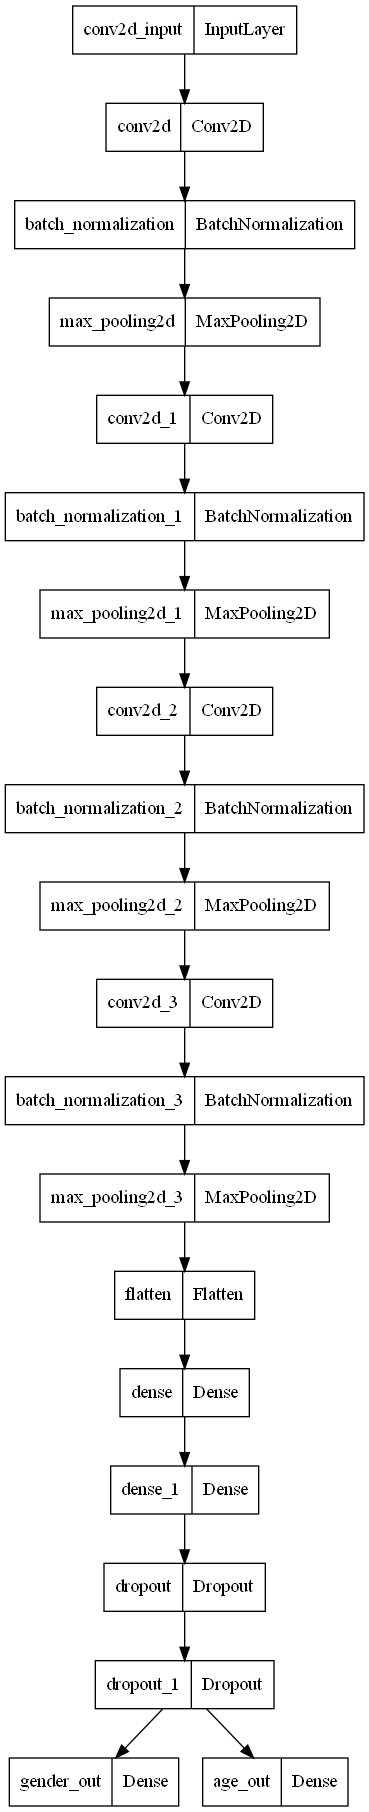

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model)

Training our Model

In [23]:
model.fit(x=train_images, y=[train_genders, train_ages], batch_size=32, epochs=30, validation_split=0.2, verbose=1)

Epoch 1/30
427/427 [==============================] - 805s 2s/step - loss: 151.0117 - gender_out_loss: 1.4633 - age_out_loss: 149.5484 - gender_out_accuracy: 0.6040 - gender_out_mae: 0.4043 - age_out_accuracy: 0.0403 - age_out_mae: 9.3139 - val_loss: 137.1067 - val_gender_out_loss: 0.5854 - val_age_out_loss: 136.5213 - val_gender_out_accuracy: 0.7029 - val_gender_out_mae: 0.3504 - val_age_out_accuracy: 0.0507 - val_age_out_mae: 8.9353
Epoch 2/30
427/427 [==============================] - 796s 2s/step - loss: 95.7338 - gender_out_loss: 0.6506 - age_out_loss: 95.0832 - gender_out_accuracy: 0.6804 - gender_out_mae: 0.3715 - age_out_accuracy: 0.0441 - age_out_mae: 7.3057 - val_loss: 83.4914 - val_gender_out_loss: 0.5326 - val_age_out_loss: 82.9589 - val_gender_out_accuracy: 0.7326 - val_gender_out_mae: 0.3576 - val_age_out_accuracy: 0.0554 - val_age_out_mae: 6.9094
Epoch 3/30
427/427 [==============================] - 864s 2s/step - loss: 77.7827 - gender_out_loss: 0.5655 - age_out_loss: 7

In [24]:
#model.save('D:\DL Practical\Miniproject (Take 3)\dl_take3_model.h5')

Evaluating our Model

In [25]:
test_loss, test_gender_loss, test_age_loss, test_gender_acc, test_gender_mae, test_age_acc, test_age_mae = model.evaluate(x=test_images, y=[test_genders, test_ages], verbose=0)
print('Gender Accuracy: {:.2f}%'.format(test_gender_acc * 100))
print('Age Accuracy: {:.2f}%'.format(test_age_acc * 100))

Gender Accuracy: 84.21%
Age Accuracy: 4.95%


Testing our Model

In [233]:
image_index = 3000
print("Actual Gender:", age_classnames[test_genders[image_index]])
print("Actual Age:", test_ages[image_index])

Actual Gender: Female
Actual Age: 22


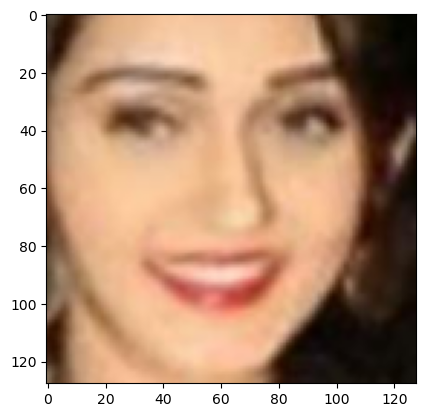

In [234]:
plt.imshow(test_images[image_index])

In [235]:
pred = model.predict(test_images[image_index].reshape(1, 128, 128, 3))
pred_gender = age_classnames[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

1/1 [==============================] - 0s 122ms/step


In [236]:
print("Predicted Gender:", pred_gender)
print("Predicted Age:", pred_age)

Predicted Gender: Female
Predicted Age: 24


In [131]:
testing_img_size = (128, 128)
test_image_yash = cv2.imread(r'D:\DL Practical\Yash Takte (Take 3).jpg')

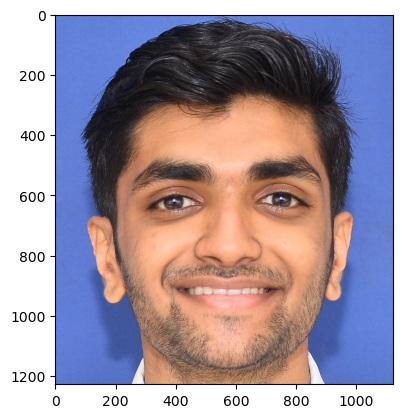

In [132]:
test_image_yash = cv2.cvtColor(test_image_yash, cv2.COLOR_BGR2RGB)
plt.imshow(test_image_yash)
plt.show()

In [133]:
test_image_yash = cv2.resize(test_image_yash, testing_img_size)

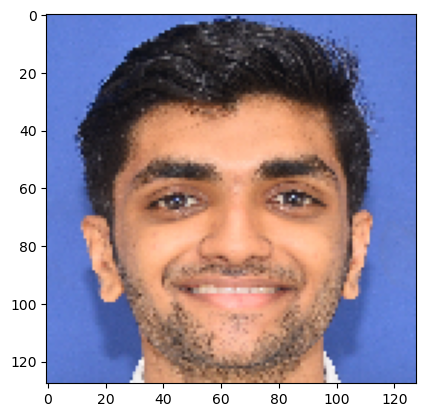

In [134]:
plt.imshow(test_image_yash)
plt.show()

In [135]:
test_image_yash = np.array(test_image_yash)
test_image_yash = test_image_yash / 255.0

In [136]:
pred_yash = model.predict(test_image_yash.reshape(1, 128, 128, 3))
pred_gender_yash = age_classnames[round(pred_yash[0][0][0])]
pred_age_yash = round(pred_yash[1][0][0])

1/1 [==============================] - 0s 132ms/step


In [137]:
print("Actual Gender: Male")
print("Actual Age: 21")

Actual Gender: Male
Actual Age: 21


In [138]:
print("Predicted Gender:", pred_gender_yash)
print("Predicted Age:", pred_age_yash)

Predicted Gender: Male
Predicted Age: 21
